<a href="https://colab.research.google.com/github/saumilhj/projects/blob/main/ANN_Wine_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**WINE CLASSIFICATION WITH ANN**

Dataset from Kaggle: https://www.kaggle.com/datasets/nareshbhat/wine-quality-binary-classification

###  Import libraries

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow import keras
from keras import layers, callbacks, losses

### Import data

In [2]:
df = pd.read_csv('wine_data.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [3]:
print(f'There are a total of {len(df.index)} records.')

There are a total of 1599 records.


Change target variable quality to binary values 1 and 0

In [4]:
df['quality'] = df['quality'].map({'good': 1, 'bad': 0})

### Check NaN and duplicates

In [5]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
df[df.duplicated()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,0
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,0
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,0
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,0
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,0
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,0
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,0


In [7]:
df.drop_duplicates(keep='first', inplace=True)

### Split data into features and target


In [8]:
X = df.drop('quality', axis=1)
y = df['quality']

Distribution of target

array([[<AxesSubplot:title={'center':'quality'}>]], dtype=object)

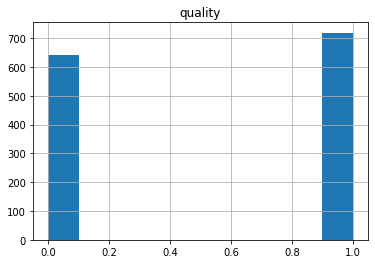

In [9]:
df.hist('quality')

The distribution for good and bad wine is fairly equal and not skewed

Spread of features

In [10]:
X_molten = X.melt()

In [11]:
fig = px.box(X_molten,x='variable', y='value', title='Spread of features', color='variable')
fig.show()

As seen in the figure, the ranges of the feature variables are far away. So scaling will be required

### Artifical Neural Network Implementation

In [12]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, stratify=y, random_state=10)

Apply scaling to X_train and X_test

In [13]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.fit_transform(X_val)

#### Create neural network

Define early stopping

In [14]:
early_stop = callbacks.EarlyStopping(min_delta=0.001, patience=20, restore_best_weights=True)

Define model

In [15]:
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[11]),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss=losses.BinaryCrossentropy(), metrics=['binary_accuracy'])

history = model.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), callbacks=[early_stop], batch_size=16, epochs=500)

Epoch 1/500
64/64 [==============================] - 1s 9ms/step - loss: 0.5664 - binary_accuracy: 0.7115 - val_loss: 0.5320 - val_binary_accuracy: 0.7412
Epoch 2/500
64/64 [==============================] - 0s 5ms/step - loss: 0.5080 - binary_accuracy: 0.7409 - val_loss: 0.5243 - val_binary_accuracy: 0.7529
Epoch 3/500
64/64 [==============================] - 0s 6ms/step - loss: 0.4946 - binary_accuracy: 0.7488 - val_loss: 0.5215 - val_binary_accuracy: 0.7559
Epoch 4/500
64/64 [==============================] - 0s 4ms/step - loss: 0.4945 - binary_accuracy: 0.7478 - val_loss: 0.5235 - val_binary_accuracy: 0.7618
Epoch 5/500
64/64 [==============================] - 1s 11ms/step - loss: 0.4837 - binary_accuracy: 0.7537 - val_loss: 0.5111 - val_binary_accuracy: 0.7588
Epoch 6/500
64/64 [==============================] - 1s 9ms/step - loss: 0.4779 - binary_accuracy: 0.7625 - val_loss: 0.5222 - val_binary_accuracy: 0.7529
Epoch 7/500
64/64 [==============================] - 0s 5ms/step - lo

Plot learning curves and accuracy

In [16]:
history_df = pd.DataFrame(history.history)

<AxesSubplot:>

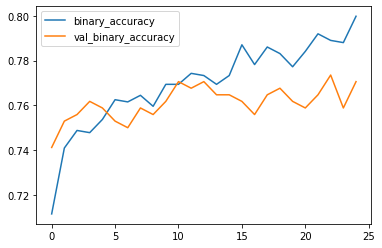

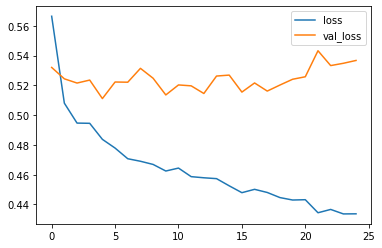

In [17]:
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot()
history_df.loc[:, ['loss', 'val_loss']].plot()

The accuracy with the validation data remains near 75 percent